In [1]:
%reset -f
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

import aux
from db.d_models import RidgeTrial as T
from plot import set_font_size
from search import ridge_viz

import PARAMETERS as P
from search import ridge_global as C

In [2]:
trials = ridge_viz.select_trials(
    smln_id='smln_2',
    filt=[T.stability > 0.5, T.speed < 30],
    order_by='speed', lmt=10000)

In [3]:
trials.head()

,id,searcher_id,seed,ridge_h,ridge_w,p_inh,rho_pc,z_pc,l_pc,w_a_pc_pc,p_a_inh_pc,w_a_inh_pc,p_g_pc_inh,w_g_pc_inh,fr_ec,stability,activity,speed
0,107550,20,6208,0.25,2.0,0.103101,10536.517350,1.083967,0.027264,0.006682,0.083098,0.002202,0.042366,0.015021,37.578597,1.0,2.164258,8.142423
1,84499,17,4865,0.25,2.0,0.104428,7705.015488,1.191610,0.025307,0.009749,0.076439,0.002045,0.046004,0.017458,39.837895,1.0,2.306939,9.049026
2,107544,20,6438,0.25,2.0,0.103150,10537.089722,1.083696,0.027270,0.006681,0.083097,0.002198,0.042361,0.015016,37.593134,1.0,2.351084,9.184882
3,107484,20,5671,0.25,2.0,0.106811,10510.958743,1.093359,0.026983,0.006799,0.083446,0.002166,0.041378,0.015000,37.676941,1.0,2.158858,9.342116
4,107507,20,5030,0.25,2.0,0.104532,10537.084315,1.086601,0.027149,0.006651,0.083172,0.002216,0.042649,0.015000,37.663333,1.0,2.431776,9.437676


In [4]:
cols = [
    'p_inh', 'rho_pc', 'z_pc', 'l_pc', 'w_a_pc_pc',
    'p_a_inh_pc', 'w_a_inh_pc', 'p_g_pc_inh', 'w_g_pc_inh',
    'fr_ec'
]

x = trials[cols]
x = (x - x.mean()) / x.std()
x = x.as_matrix()
y = trials['speed'].as_matrix()

### Linear regression

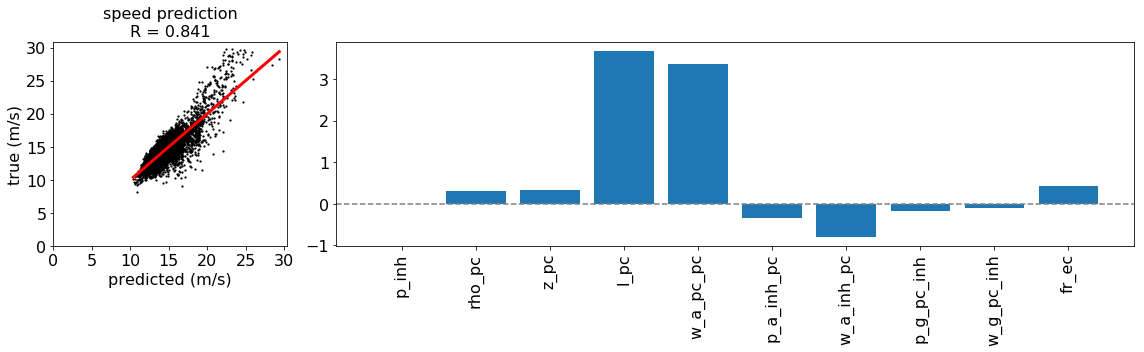

In [5]:
rgr = LinearRegression()
rgr.fit(x, y)
y_ = rgr.predict(x)
slp, icpt, r, p, _ = linregress(y_, y)

gs = gridspec.GridSpec(1, 4)

fig = plt.figure(figsize=(16, 5), tight_layout=True)

axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:])]

# plot true vs predicted

axs[0].scatter(y_, y, s=5, c='k', lw=0)
x_line = np.array([y_.min(), y_.max()])
axs[0].plot(x_line, slp*x_line + icpt, color='r', lw=3)

axs[0].set_xlim(left=0)
axs[0].set_ylim(bottom=0)

axs[0].set_xlabel('predicted (m/s)')
axs[0].set_ylabel('true (m/s)')
axs[0].set_title('speed prediction\nR = {0:.3f}'.format(r))

# plot coefs
coefs = rgr.coef_
axs[1].bar(np.arange(len(coefs)), coefs, align='center')
axs[1].axhline(0, color='gray', ls='--')
axs[1].set_xticks(np.arange(len(coefs)))
axs[1].set_xticklabels(cols, rotation=90)

for ax in axs:
    set_font_size(ax, 16)